In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

# ÌïúÍ∏Ä Í∏ÄÍº¥Ï≤¥ Î≥ÄÍ≤Ω
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() Ïù¥Îü∞Í±∞ ÌñàÏùÑ Îïå, Ïª¨ÎüºÏù¥ ÏÉùÎûµÎêòÏßÄ ÏïäÍ≥†, Î™®Îì† Ïª¨Îüº Îú®Í≤å
pd.set_option('display.max_columns', None)
# ÏßÄÏàò ÌëúÍ∏∞Î≤ï ÎåÄÏã†Ïóê ÏÜåÏàòÏ†êÏúºÎ°ú ÌëúÏãúÌïòÎäîÏΩîÎìú
pd.options.display.float_format = '{:.2f}'.format
# Í∞í Í∏∏Ïù¥ Ï†úÌïú X
pd.set_option('display.max_colwidth', None) # Í∞í Í∏∏Ïù¥ Ï†úÌïú ÏóÜÏùå

## LightGBM ÏßÑÌñâ
1. ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞
2. SMOTE-NC Îç∞Ïù¥ÌÑ∞
3. SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞
4. Í∞ÄÏ§ëÏπò

Î™®Îç∏ÎßÅ Í≥ºÏ†ïÏùÄ Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞Î°ú ÏùºÎã® ÏßÑÌñâÎê®.

### 1. ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞Î°ú LGBM ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [2]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©, Ï†ïÍ∑úÌôîÎ•º ÏßÑÌñâÌïú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞.

train = pd.read_csv("data/train/randomunder_modeling/train.csv")
val = pd.read_csv("data/train/randomunder_modeling/val.csv")
test = pd.read_csv("data/train/randomunder_modeling/test.csv")

LGBM ÌïôÏäµ

In [4]:
from lightgbm import LGBMClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# LightGBM Î™®Îç∏ ÏÉùÏÑ±
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42 
)

# Î™®Îç∏ ÌïôÏäµ
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

Validation Accuracy: 0.80

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.80      0.89   1941849
           1       0.02      0.71      0.05     13252

    accuracy                           0.80   1955101
   macro avg       0.51      0.76      0.47   1955101
weighted avg       0.99      0.80      0.88   1955101


Confusion Matrix (Validation):
[[1550978  390871]
 [   3787    9465]]


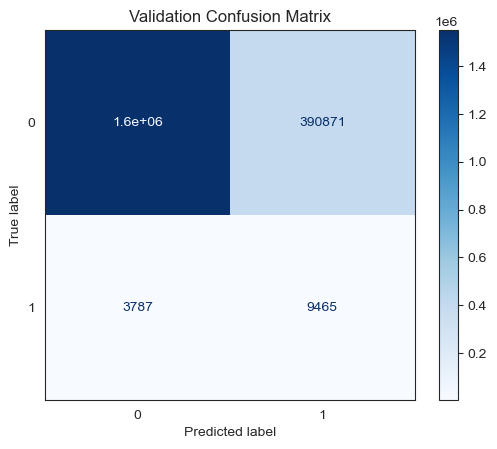

Validation AUC-ROC: 0.84


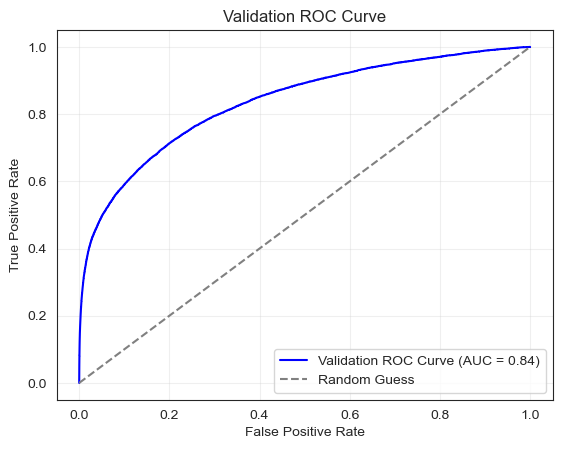

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Ïä§ÌÉÄÏùº Ï¥àÍ∏∞Ìôî
sns.set_style("white")

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (Validation) ÌèâÍ∞Ä
# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(val) ÏòàÏ∏°
val_predictions = lgbm_model.predict(X_val)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
conf_matrix = confusion_matrix(y_val, val_predictions)
print(conf_matrix)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lgbm_model.classes_)
disp_val.plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

# -----------------------------------------------------------
# AUC-ROC Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
# -----------------------------------------------------------
val_probabilities = lgbm_model.predict_proba(X_val)[:, 1]  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve Í≥ÑÏÇ∞
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)

# ROC Curve ÏãúÍ∞ÅÌôî
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

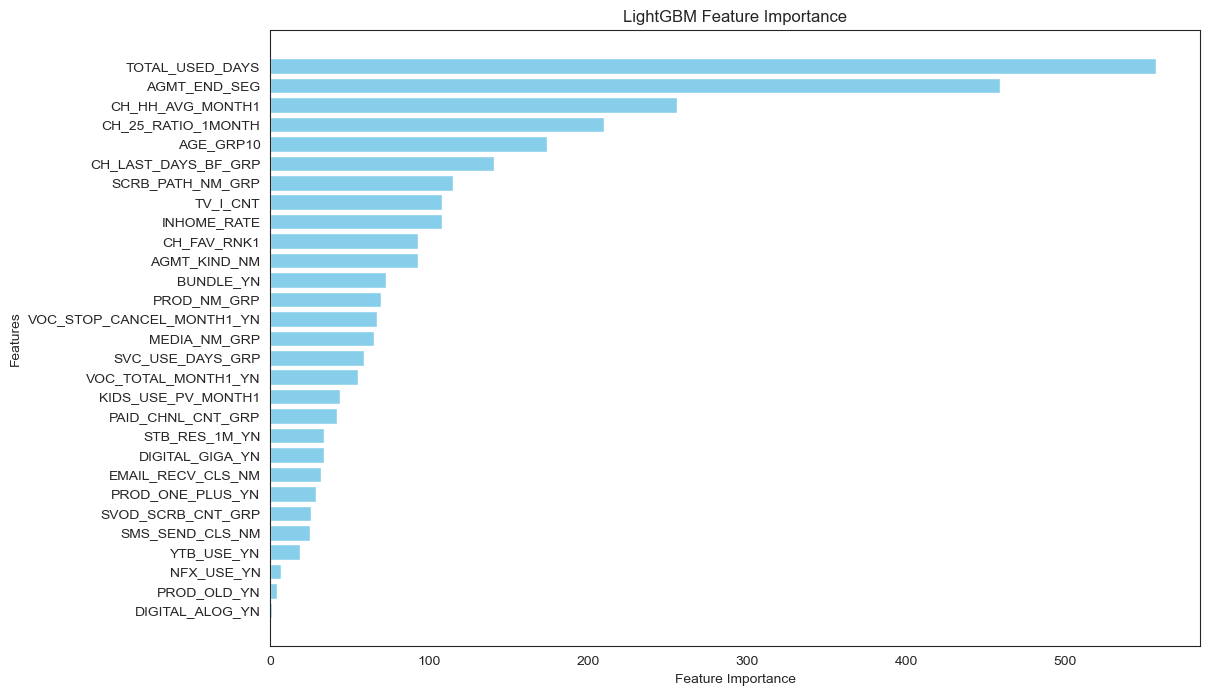

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance Ï∂îÏ∂ú
feature_importance = lgbm_model.feature_importances_

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

### 2. SMOTE-NC Îç∞Ïù¥ÌÑ∞Î°ú LGBM ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [7]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©, Ï†ïÍ∑úÌôîÎ•º ÏßÑÌñâÌïú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞.

train = pd.read_csv("data/train/smote_modeling/train.csv")
val = pd.read_csv("data/train/smote_modeling/val.csv")
test = pd.read_csv("data/train/smote_modeling/test.csv")

LGBM ÌïôÏäµ

In [8]:
from lightgbm import LGBMClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# LightGBM Î™®Îç∏ ÏÉùÏÑ±
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42 
)

# Î™®Îç∏ ÌïôÏäµ
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

Validation Accuracy: 0.86

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.86      0.92   1941866
           1       0.02      0.47      0.04     13252

    accuracy                           0.86   1955118
   macro avg       0.51      0.67      0.48   1955118
weighted avg       0.99      0.86      0.92   1955118


Confusion Matrix (Validation):
[[1675428  266438]
 [   7048    6204]]


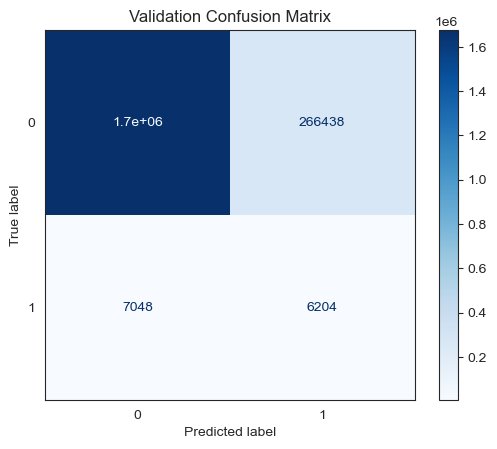

Validation AUC-ROC: 0.73


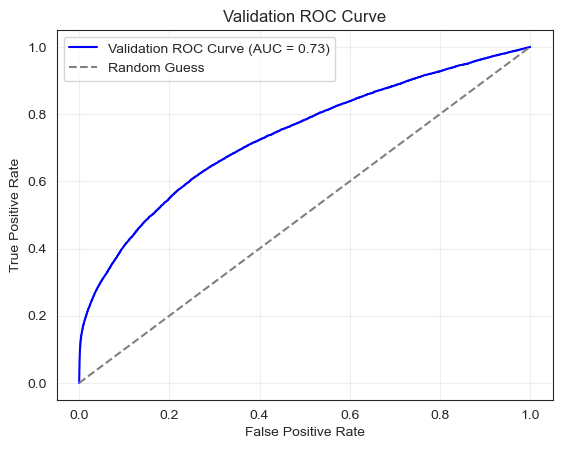

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Ïä§ÌÉÄÏùº Ï¥àÍ∏∞Ìôî
sns.set_style("white")

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (Validation) ÌèâÍ∞Ä
# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(val) ÏòàÏ∏°
val_predictions = lgbm_model.predict(X_val)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
conf_matrix = confusion_matrix(y_val, val_predictions)
print(conf_matrix)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lgbm_model.classes_)
disp_val.plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

# -----------------------------------------------------------
# AUC-ROC Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
# -----------------------------------------------------------
val_probabilities = lgbm_model.predict_proba(X_val)[:, 1]  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve Í≥ÑÏÇ∞
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)

# ROC Curve ÏãúÍ∞ÅÌôî
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

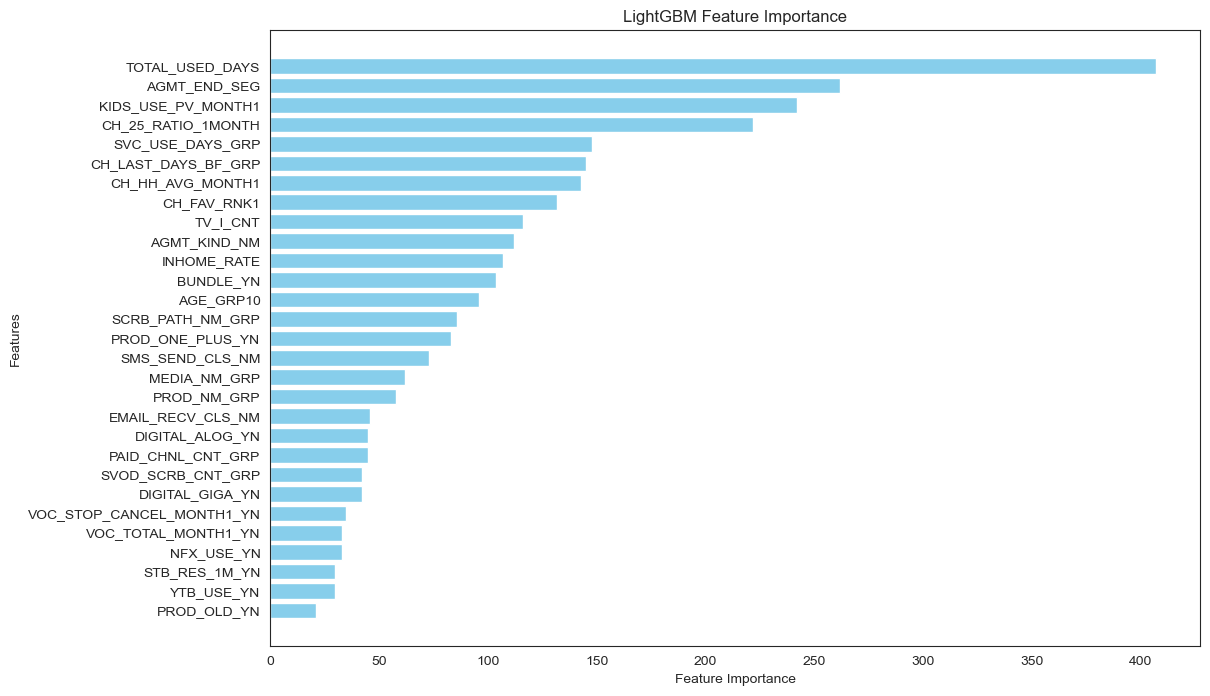

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance Ï∂îÏ∂ú
feature_importance = lgbm_model.feature_importances_

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

### 3. SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞Î°ú LGBM ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [11]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©, Ï†ïÍ∑úÌôîÎ•º ÏßÑÌñâÌïú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞.

train = pd.read_csv("data/train/smoterandom_modeling/train.csv")
val = pd.read_csv("data/train/smoterandom_modeling/val.csv")
test = pd.read_csv("data/train/smoterandom_modeling/test.csv")

LGBM ÌïôÏäµ

In [12]:
from lightgbm import LGBMClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# LightGBM Î™®Îç∏ ÏÉùÏÑ±
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42 
)

# Î™®Îç∏ ÌïôÏäµ
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

Validation Accuracy: 0.88

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.88      0.94   1941866
           1       0.03      0.44      0.05     13252

    accuracy                           0.88   1955118
   macro avg       0.51      0.66      0.49   1955118
weighted avg       0.99      0.88      0.93   1955118


Confusion Matrix (Validation):
[[1716703  225163]
 [   7361    5891]]


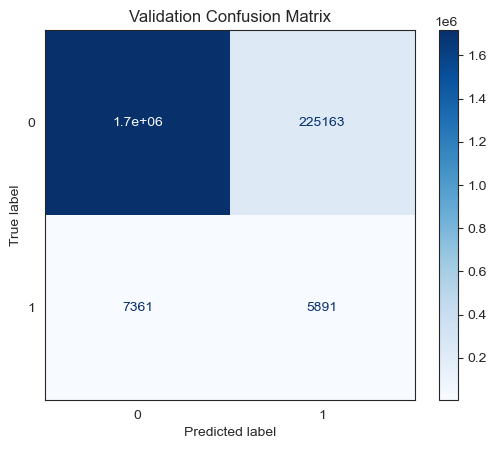

Validation AUC-ROC: 0.74


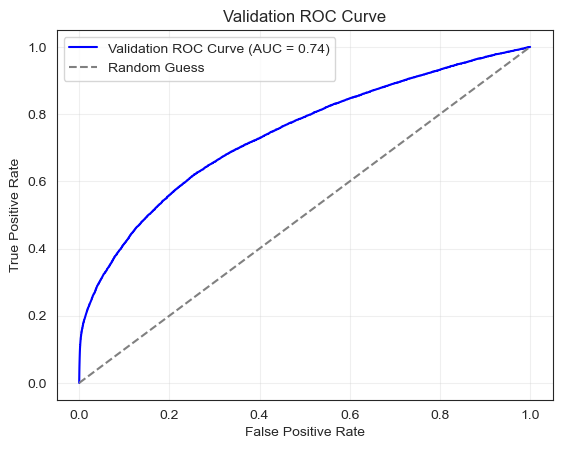

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Ïä§ÌÉÄÏùº Ï¥àÍ∏∞Ìôî
sns.set_style("white")

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (Validation) ÌèâÍ∞Ä
# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(val) ÏòàÏ∏°
val_predictions = lgbm_model.predict(X_val)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
conf_matrix = confusion_matrix(y_val, val_predictions)
print(conf_matrix)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lgbm_model.classes_)
disp_val.plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

# -----------------------------------------------------------
# AUC-ROC Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
# -----------------------------------------------------------
val_probabilities = lgbm_model.predict_proba(X_val)[:, 1]  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve Í≥ÑÏÇ∞
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)

# ROC Curve ÏãúÍ∞ÅÌôî
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

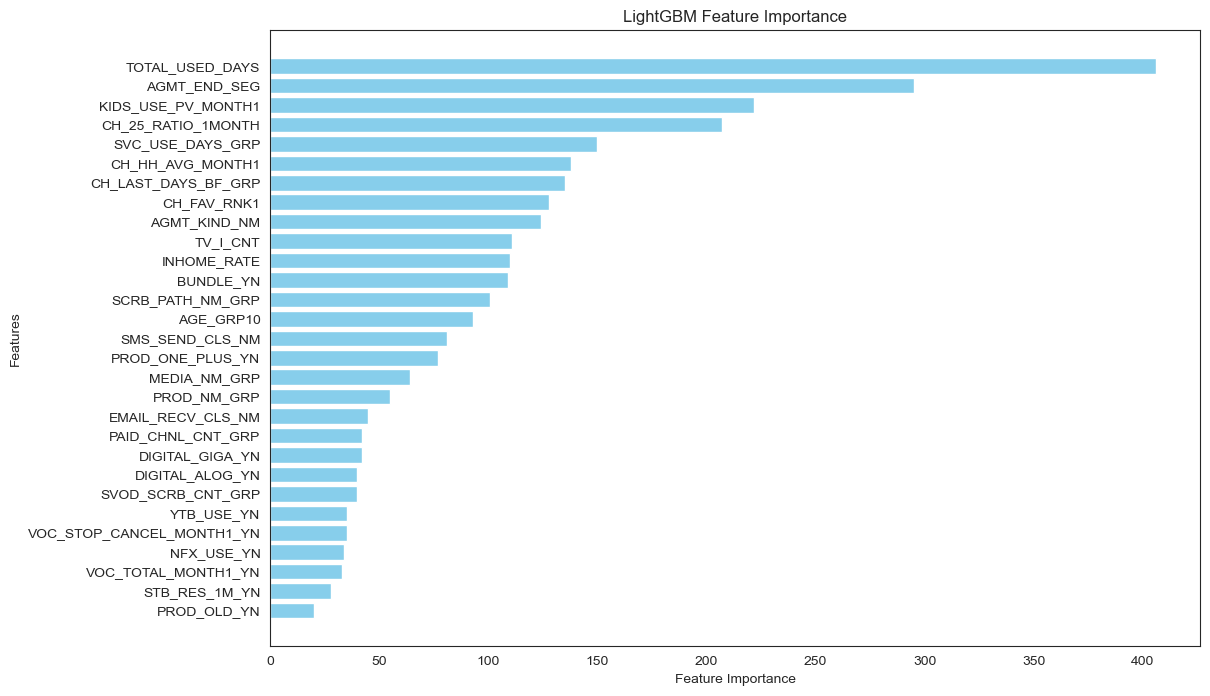

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance Ï∂îÏ∂ú
feature_importance = lgbm_model.feature_importances_

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

### 4. Í∞ÄÏ§ëÏπòÎ°ú XGB ÏßÑÌñâ

#### Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© + Ï†ïÍ∑úÌôî + Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÏóêÎäî Robust Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [15]:
train = pd.read_csv("data/train/train.csv")
val = pd.read_csv("data/train/validation.csv")
test = pd.read_csv("data/train/test.csv")

In [16]:
val = val.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])
test = test.drop(columns=['sha2_hash','p_mt','AGMT_END_YMD'])

In [17]:
# INHOME_RATE Ïª¨ÎüºÏùÄ objectÎ°ú

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
val['INHOME_RATE'] = val['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(val['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object
object


In [18]:
# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏßÑÌñâ!

from sklearn.preprocessing import LabelEncoder

categorical_cols = train.select_dtypes(include=['object']).columns

# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏàòÌñâ
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    val[col] = le.transform(val[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù


In [19]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ÎÇ¥Í∞Ä Ï†ïÌïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'KIDS_USE_PV_MONTH1', 'CH_25_RATIO_1MONTH']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
val[robust_columns] = robust_scaler.transform(val[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
val[minmax_columns] = minmax_scaler.transform(val[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")

robust, minmax ÎÅù


LGBM ÌïôÏäµ

In [20]:
from lightgbm import LGBMClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# LightGBM Î™®Îç∏ ÏÉùÏÑ±
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    class_weight='balanced',  # ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Ï†ÅÏö©
    random_state=42 
)

# Î™®Îç∏ ÌïôÏäµ
lgbm_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', random_state=42)

Validation Accuracy: 0.81

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1941866
           1       0.02      0.71      0.05     13252

    accuracy                           0.81   1955118
   macro avg       0.51      0.76      0.47   1955118
weighted avg       0.99      0.81      0.89   1955118


Confusion Matrix (Validation):
[[1564699  377167]
 [   3871    9381]]


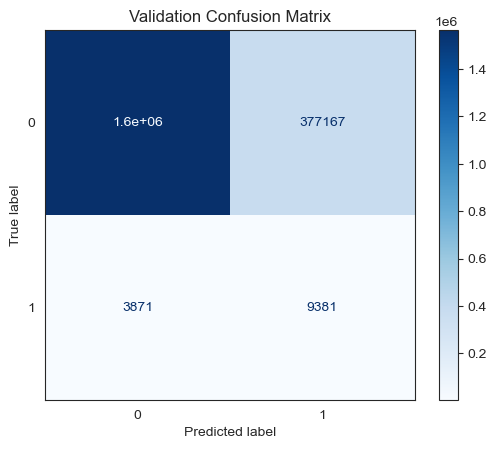

Validation AUC-ROC: 0.84


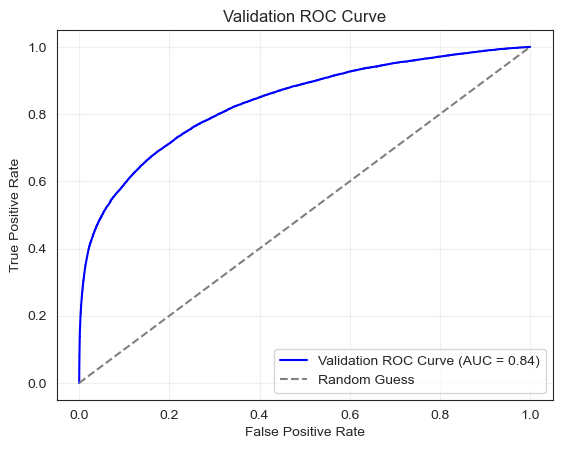

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn Ïä§ÌÉÄÏùº Ï¥àÍ∏∞Ìôî
sns.set_style("white")

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
X_val = val.drop(columns=['churn'])
y_val = val['churn']

# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (Validation) ÌèâÍ∞Ä
# -----------------------------------------------------------
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(val) ÏòàÏ∏°
val_predictions = lgbm_model.predict(X_val)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Classification Report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_predictions))

# Confusion Matrix
print("\nConfusion Matrix (Validation):")
conf_matrix = confusion_matrix(y_val, val_predictions)
print(conf_matrix)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lgbm_model.classes_)
disp_val.plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

# -----------------------------------------------------------
# AUC-ROC Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
# -----------------------------------------------------------
val_probabilities = lgbm_model.predict_proba(X_val)[:, 1]  # ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú ÌôïÎ•†
val_auc = roc_auc_score(y_val, val_probabilities)
print(f"Validation AUC-ROC: {val_auc:.2f}")

# ROC Curve Í≥ÑÏÇ∞
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)

# ROC Curve ÏãúÍ∞ÅÌôî
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Validation ROC Curve (AUC = {val_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

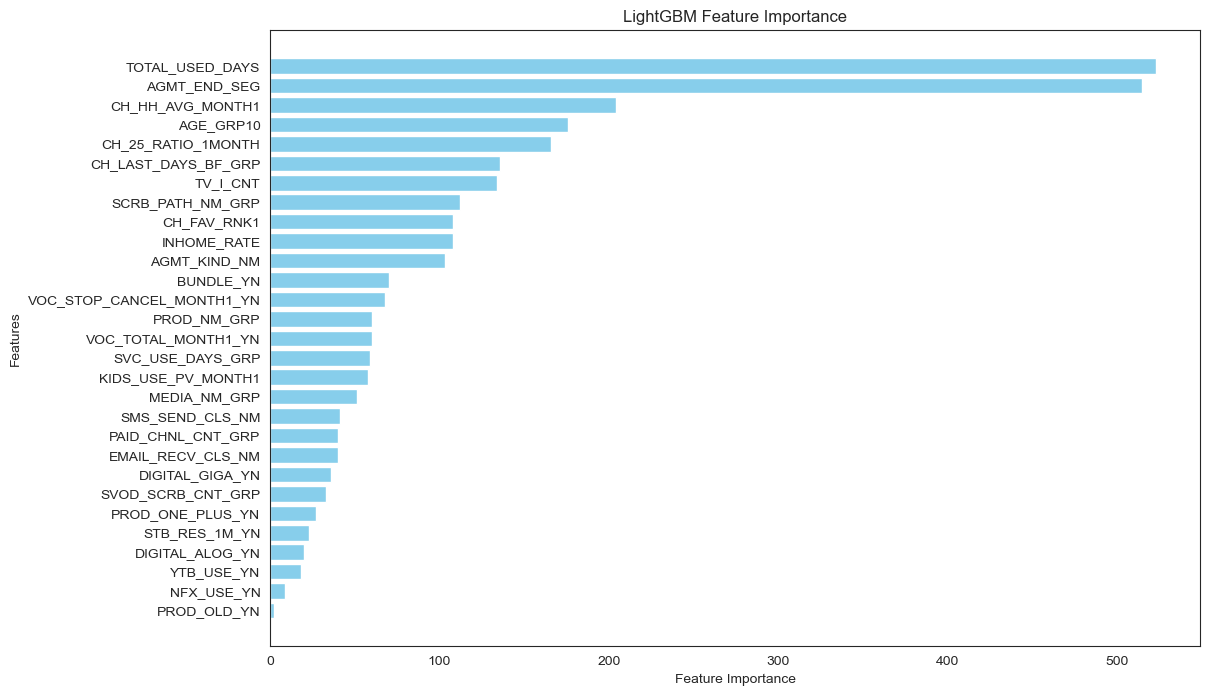

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance Ï∂îÏ∂ú
feature_importance = lgbm_model.feature_importances_

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

#### Í≤∞Î°†
LGBMÎäî ÎûúÎç§ Ïñ∏Îçî, Í∞ÄÏ§ëÏπòÎ•º ÌñàÏùÑ Îïå, Í∞ÄÏû• Ï¢ãÎã§

### üìå LGBM ÏÑ±Îä• ÎπÑÍµê (Sampling Í∏∞Î≤ïÎ≥Ñ)

| ÏÉòÌîåÎßÅ Í∏∞Î≤ï             | Accuracy | 1Ïùò Recall | ROC-AUC |
|------------------------|----------|-----------|---------|
| <span style="color:red;">**ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ**</span>     | 0.80     | 0.71      | 0.84    |
| **SMOTE**              | 0.86     | 0.47      | 0.73    |
| **SMOTE + ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ** | 0.88     | 0.44      | 0.74    |
| <span style="color:red;">**Í∞ÄÏ§ëÏπò Ï°∞Ï†ï**</span>        | 0.81     | 0.71      | 0.84    |